<a href="https://colab.research.google.com/github/drwitt/BME_590_Tensorflow_Deep_Learning/blob/master/BME_MML_Lecture_1_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install tensorflow_datasets
!pip3 install tensorflow-gpu==2.0.0-rc0

In [0]:
!nvidia-smi

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [0]:
ds_corrupted = tfds.load('mnist_corrupted/shot_noise', shuffle_files=False, split=tfds.Split.TRAIN)
ds_identity = tfds.load('mnist_corrupted/identity', shuffle_files=False, split=tfds.Split.TRAIN)
ds_corrupted = ds_corrupted.map(lambda x: x['image'])
ds_identity = ds_identity.map(lambda x: x['image'])
ds = tf.data.Dataset.zip((ds_corrupted, ds_identity))

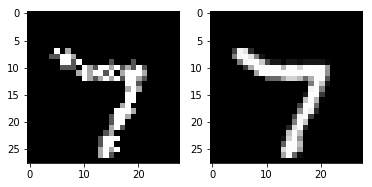

In [0]:
BATCH_SIZE = 128

for x,y in ds: break
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.squeeze(x.numpy()), cmap='gray')
axes[1].imshow(np.squeeze(y.numpy()), cmap='gray')
ds = ds.batch(BATCH_SIZE).repeat()

In [0]:
inputs = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(784, activation='relu')(x)
x = tf.keras.layers.Dense(784, activation='relu')(x)
x = tf.keras.layers.Reshape((28, 28, 1))(x)
model = tf.keras.Model(inputs, x)

In [0]:
model.compile('adam', loss='mse')

In [0]:
model.fit(ds, steps_per_epoch=50000//128, epochs=20)

Epoch 1/20
390/390 [==============================] - 23s 60ms/step - loss: 562.6638
Epoch 2/20
390/390 [==============================] - 22s 57ms/step - loss: 560.8817
Epoch 3/20
390/390 [==============================] - 23s 58ms/step - loss: 562.3512
Epoch 4/20
390/390 [==============================] - 22s 58ms/step - loss: 561.5155
Epoch 5/20
390/390 [==============================] - 23s 59ms/step - loss: 561.0012
Epoch 6/20
390/390 [==============================] - 22s 58ms/step - loss: 559.5476
Epoch 7/20
390/390 [==============================] - 23s 58ms/step - loss: 556.1285
Epoch 8/20
390/390 [==============================] - 23s 59ms/step - loss: 553.7849
Epoch 9/20
390/390 [==============================] - 23s 58ms/step - loss: 554.5665
Epoch 10/20
390/390 [==============================] - 23s 58ms/step - loss: 553.7455
Epoch 11/20
390/390 [==============================] - 23s 59ms/step - loss: 552.8558
Epoch 12/20
390/390 [==============================] - 22s 57ms

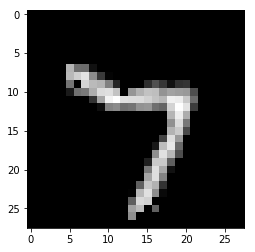

In [0]:
for x,y in ds: break
fig, axes = plt.subplots(1,3)
axes[0].imshow(np.squeeze(x.numpy()), cmap='gray')
axes[1].imshow(np.squeeze(y.numpy()), cmap='gray')
axes[2].imshow(np.squeeze(model.predict(x.numpy()[0:1])), cmap='gray')
